In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# List of CSV files
csv_folder = "csv_files"
csv_files = [os.path.join(csv_folder, f) for f in os.listdir(csv_folder) if f.endswith('.csv')]

In [4]:
def exponential_moving_average(data, alpha):
    """Apply exponential moving average filter to data"""
    ema = np.zeros_like(data)
    ema[0] = data[0]
    for i in range(1, len(data)):
        ema[i] = alpha * data[i] + (1 - alpha) * ema[i - 1]
    return ema

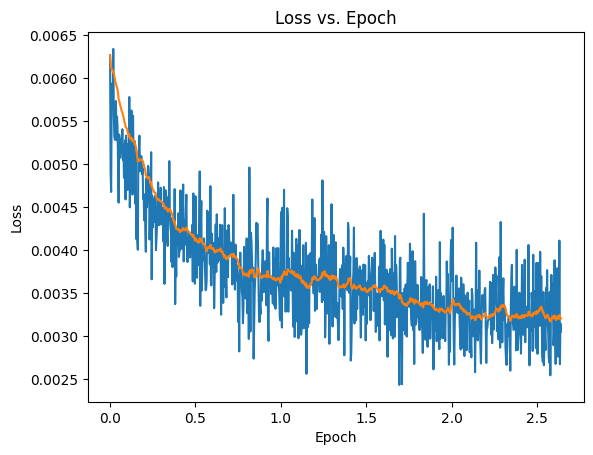

In [7]:
# Initialize an empty list to store the "loss" columns
loss_columns = []

# Loop through each file and read the "loss" column
for file in csv_files:
    df = pd.read_csv(file)
    loss_columns.append(df["loss"])

# Concatenate the "loss" columns
concatenated_loss = pd.concat(loss_columns, axis=0)

epoch_length = 320

# Filter the concatenated "loss" column with a exponential moving average filter
filtered_loss = exponential_moving_average(np.asanyarray(concatenated_loss), 0.05)


# Plot the concatenated "loss" column
plt.plot(np.arange(len(concatenated_loss)) / epoch_length, concatenated_loss)
plt.plot(np.arange(len(concatenated_loss)) / epoch_length, filtered_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.show()